Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
    
Determine the number of clusters using the elbow method.
    
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [7]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='Windows-1252')

# Display the first few rows of the dataset
print(df.head())

# Check for any missing values
print(df.isnull().sum())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [8]:
# Select relevant numerical columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df_clustering = df[features]

# Check the cleaned dataset
print(df_clustering.head())


   QUANTITYORDERED  PRICEEACH    SALES  MSRP
0               30      95.70  2871.00    95
1               34      81.35  2765.90    95
2               41      94.74  3884.34    95
3               45      83.26  3746.70    95
4               49     100.00  5205.27    95


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)


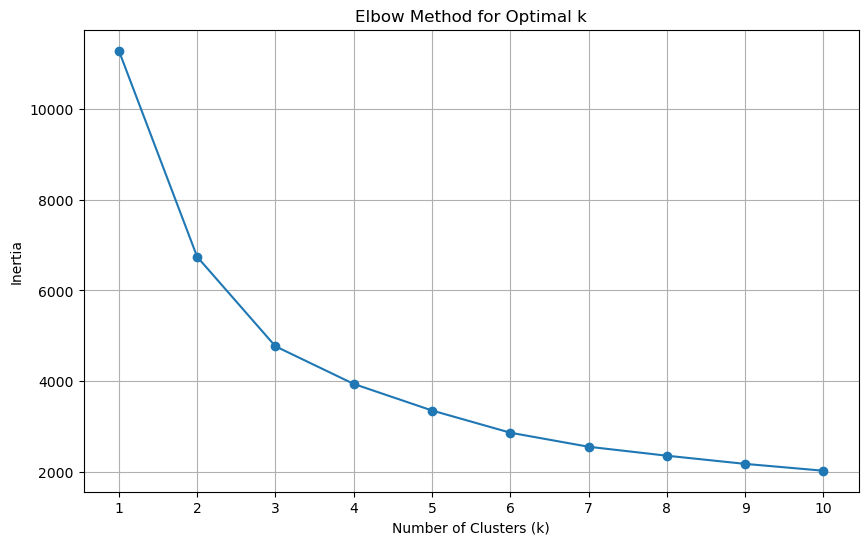

In [16]:
# Elbow Method
inertia = []
k_range = range(1, 11)  # Test from 1 to 10 clusters

# inertia: A list to store the "inertia" (a measure of how tight the clusters are) for each value of k
# k_range: The range of cluster numbers to test, from 1 to 10 clusters.

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [17]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, n_init=10,random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster centers
print("Cluster Centers:\n", scaler.inverse_transform(kmeans.cluster_centers_))


Cluster Centers:
 [[  29.39448052   56.20646104 1618.11339286   62.7012987 ]
 [  43.28270042   99.49458509 6053.83308017  135.57946554]
 [  27.48294243   96.57534115 3170.69171642  114.49573561]
 [  43.74014337   72.07270609 3149.61801075   75.09318996]]


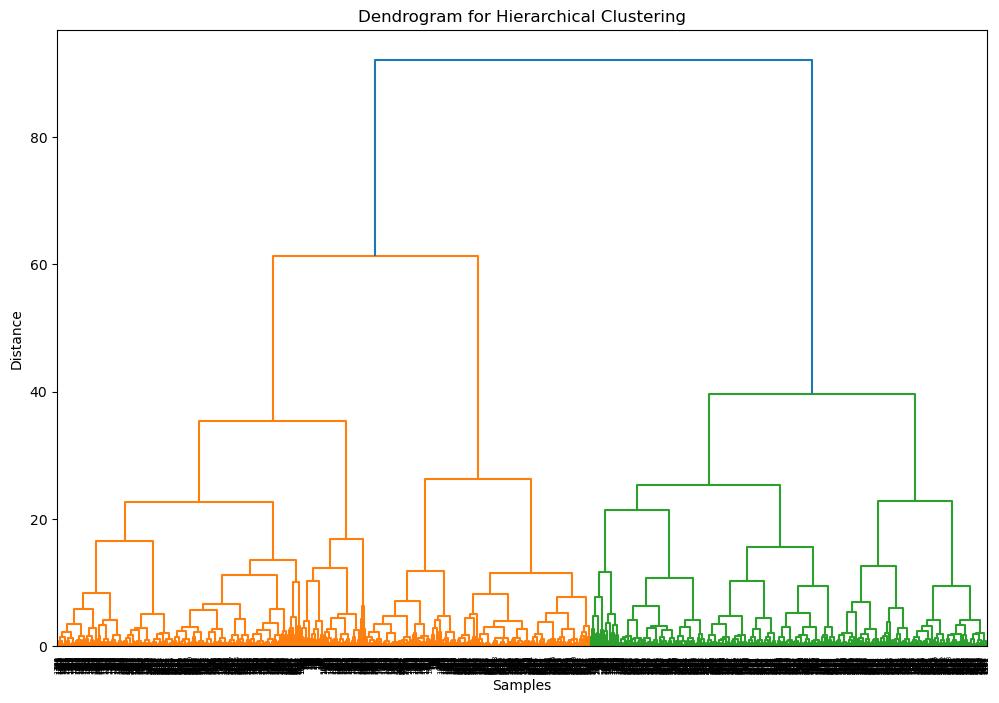

In [15]:
# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


Required Theory
1. Clustering in Data Science
Clustering is an unsupervised machine learning technique used to group data points into clusters, where each group contains similar data points. The main objective is to find a natural grouping among the dataset's items without predefined labels. This is often used in customer segmentation, market research, and more.

2. K-Means Clustering
K-Means is a popular clustering algorithm that partitions data into a pre-defined number of clusters, 
𝑘
k. The algorithm iterates to find 
𝑘
k centroids and assigns each data point to the nearest centroid. The goal is to minimize the within-cluster sum of squares (WCSS), which represents the compactness of the clusters.

Steps in K-Means:
Initialize 
𝑘
k centroids randomly.
Assign each data point to the nearest centroid.
Recompute centroids based on the mean position of points in each cluster.
Repeat these steps until the centroids no longer change significantly.
3. Hierarchical Clustering
Hierarchical clustering is another popular clustering technique, which builds a hierarchy of clusters. It can be:

Agglomerative (bottom-up): Starts with each data point as an individual cluster, then merges the closest pairs of clusters step-by-step until only one cluster remains.

Divisive (top-down): Starts with all data points in one cluster and splits them iteratively.

Distance Metrics: Common metrics include Euclidean distance, Manhattan distance, and cosine similarity. These metrics measure the proximity between data points for determining clusters.

4. The Elbow Method
The elbow method is a technique to determine the optimal number of clusters in K-Means. It evaluates the Within-Cluster Sum of Squares (WCSS) for different values of 
𝑘
k and finds the point where the decrease in WCSS slows down. This point, where WCSS no longer decreases significantly with increasing 
𝑘
k, is considered the optimal number of clusters. This "elbow" point signifies a balance between minimal within-cluster variance and the number of clusters.

Plotting the Elbow Curve:
Run K-Means for a range of 
𝑘
k values (e.g., from 1 to 10).
Plot 
𝑘
k on the x-axis and WCSS on the y-axis.
The "elbow" is the point where WCSS stops decreasing rapidly, indicating the optimal number of clusters.
5. Evaluation Metrics
After clustering, these metrics are often used to assess the quality of clusters:

Silhouette Score: Measures how close points in a cluster are to points in the nearest cluster, with a higher score indicating better-defined clusters.
Inertia/WCSS: Measures the sum of squared distances between each point and its centroid, aiming for a lower WCSS to represent more compact clusters.